# Data exploration

The goal of this notebook is to explore RAISE dataset.

First we import common modules and we set up the constants

In [1]:
import os
import pandas as pd
from utility_functions import log_progress

CSV_LINK = "../data/raw/RAISE_6k.csv"
KEYWORDS = ["outdoor", "indoor", "landscape", "nature", "people", "objects", "buildings"]
DOWNLOAD_IMAGES = True # If images have already been downloaded we don't need them
NB_IMAGES_TO_PROCESS = 50

## Extract useful features

In this part, we will see how the dataset is formed and what useful features we can form.

We can show how the dataset is formed:

In [2]:
df = pd.read_csv(CSV_LINK)
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 63 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   File                     6000 non-null   object 
 1   NEF                      6000 non-null   object 
 2   TIFF                     6000 non-null   object 
 3   Date Created             6000 non-null   object 
 4   Date Modified            6000 non-null   object 
 5   File Size                6000 non-null   object 
 6   Image Size               6000 non-null   object 
 7   Date Shot                6000 non-null   object 
 8   Time Zone and Date       5949 non-null   object 
 9   Image Quality            6000 non-null   object 
 10  Artist                   4276 non-null   object 
 11  Copyright                4276 non-null   object 
 12  Image Comment            232 non-null    object 
 13  Device                   6000 non-null   object 
 14  Lens                    

,File,NEF,TIFF,Date Created,Date Modified,File Size,Image Size,Date Shot,Time Zone and Date,Image Quality,...,Sharpening.1,Latitude,Longitude,Altitude,Altitude Reference,Heading,UTC,Map Datum,Scene Mode,Keywords
0,r000da54ft,http://193.205.194.113/RAISE/NEF/r000da54ft.NEF,http://193.205.194.113/RAISE/TIFF/r000da54ft.TIF,9/20/2014 23:51,3/19/2012 9:14,9.79 MB,L (4288 x 2848),14:14.0,"UTC+1, DST:ON",Compressed RAW (12-bit),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nature; outdoor
1,r001d260dt,http://193.205.194.113/RAISE/NEF/r001d260dt.NEF,http://193.205.194.113/RAISE/TIFF/r001d260dt.TIF,9/21/2014 9:58,5/11/2013 6:45,20.0 MB,L (4928 x 3264),45:58.6,"UTC+1, DST:ON",Lossless Compressed RAW (14-bit),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aperture Priority,buildings; outdoor
2,r002fc3e2t,http://193.205.194.113/RAISE/NEF/r002fc3e2t.NEF,http://193.205.194.113/RAISE/TIFF/r002fc3e2t.TIF,9/21/2014 3:29,5/4/2014 8:42,21.5 MB,L (4928 x 3264),42:11.6,"UTC+1, DST:ON",Lossless Compressed RAW (14-bit),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outdoor; people
3,r00444b95t,http://193.205.194.113/RAISE/NEF/r00444b95t.NEF,http://193.205.194.113/RAISE/TIFF/r00444b95t.TIF,9/21/2014 12:20,9/2/2013 11:02,19.8 MB,L (4928 x 3264),02:23.5,"UTC+1, DST:ON",Lossless Compressed RAW (14-bit),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manual,buildings; outdoor
4,r005f3e70t,http://193.205.194.113/RAISE/NEF/r005f3e70t.NEF,http://193.205.194.113/RAISE/TIFF/r005f3e70t.TIF,9/20/2014 23:19,2/18/2012 12:08,10.6 MB,L (4288 x 2848),08:05.0,"UTC+1, DST:OFF",Compressed RAW (12-bit),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,buildings; outdoor
5,r00617aa1t,http://193.205.194.113/RAISE/NEF/r00617aa1t.NEF,http://193.205.194.113/RAISE/TIFF/r00617aa1t.TIF,9/20/2014 16:03,9/23/2011 21:19,18.7 MB,L (4928 x 3264),19:44.2,"UTC+1, DST:ON",Lossless Compressed RAW (14-bit),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,buildings; outdoor
6,r00679daet,http://193.205.194.113/RAISE/NEF/r00679daet.NEF,http://193.205.194.113/RAISE/TIFF/r00679daet.TIF,9/20/2014 17:19,8/21/2012 14:36,18.3 MB,L (4928 x 3264),36:56.8,"UTC+1, DST:ON",Lossless Compressed RAW (14-bit),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,objects; outdoor
7,r006b0e4bt,http://193.205.194.113/RAISE/NEF/r006b0e4bt.NEF,http://193.205.194.113/RAISE/TIFF/r006b0e4bt.TIF,9/20/2014 22:57,2/17/2012 10:16,10.1 MB,L (4288 x 2848),16:17.0,"UTC+1, DST:OFF",Compressed RAW (12-bit),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indoor
8,r006fcc20t,http://193.205.194.113/RAISE/NEF/r006fcc20t.NEF,http://193.205.194.113/RAISE/TIFF/r006fcc20t.TIF,9/21/2014 12:35,9/22/2013 11:02,21.8 MB,L (4928 x 3264),02:21.3,"UTC+1, DST:ON",Lossless Compressed RAW (14-bit),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aperture Priority,landscape; outdoor
9,r007f5116t,http://193.205.194.113/RAISE/NEF/r007f5116t.NEF,http://193.205.194.113/RAISE/TIFF/r007f5116t.TIF,9/21/2014 3:43,5/17/2014 11:36,18.5 MB,L (4928 x 3264),36:51.0,"UTC+1, DST:ON",Lossless Compressed RAW (14-bit),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,buildings; outdoor


We can select only useful features (delete everything specific to the camera)

In [3]:
df = df[["File", "TIFF", "File Size", "Image Size", "Image Quality", "Keywords"]]
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   File           6000 non-null   object
 1   TIFF           6000 non-null   object
 2   File Size      6000 non-null   object
 3   Image Size     6000 non-null   object
 4   Image Quality  6000 non-null   object
 5   Keywords       6000 non-null   object
dtypes: object(6)
memory usage: 281.4+ KB


,File,TIFF,File Size,Image Size,Image Quality,Keywords
0,r000da54ft,http://193.205.194.113/RAISE/TIFF/r000da54ft.TIF,9.79 MB,L (4288 x 2848),Compressed RAW (12-bit),nature; outdoor
1,r001d260dt,http://193.205.194.113/RAISE/TIFF/r001d260dt.TIF,20.0 MB,L (4928 x 3264),Lossless Compressed RAW (14-bit),buildings; outdoor
2,r002fc3e2t,http://193.205.194.113/RAISE/TIFF/r002fc3e2t.TIF,21.5 MB,L (4928 x 3264),Lossless Compressed RAW (14-bit),outdoor; people
3,r00444b95t,http://193.205.194.113/RAISE/TIFF/r00444b95t.TIF,19.8 MB,L (4928 x 3264),Lossless Compressed RAW (14-bit),buildings; outdoor
4,r005f3e70t,http://193.205.194.113/RAISE/TIFF/r005f3e70t.TIF,10.6 MB,L (4288 x 2848),Compressed RAW (12-bit),buildings; outdoor
5,r00617aa1t,http://193.205.194.113/RAISE/TIFF/r00617aa1t.TIF,18.7 MB,L (4928 x 3264),Lossless Compressed RAW (14-bit),buildings; outdoor
6,r00679daet,http://193.205.194.113/RAISE/TIFF/r00679daet.TIF,18.3 MB,L (4928 x 3264),Lossless Compressed RAW (14-bit),objects; outdoor
7,r006b0e4bt,http://193.205.194.113/RAISE/TIFF/r006b0e4bt.TIF,10.1 MB,L (4288 x 2848),Compressed RAW (12-bit),Indoor
8,r006fcc20t,http://193.205.194.113/RAISE/TIFF/r006fcc20t.TIF,21.8 MB,L (4928 x 3264),Lossless Compressed RAW (14-bit),landscape; outdoor
9,r007f5116t,http://193.205.194.113/RAISE/TIFF/r007f5116t.TIF,18.5 MB,L (4928 x 3264),Lossless Compressed RAW (14-bit),buildings; outdoor


Then we can extract specific data from these features.

In [4]:
def split_image_size(image_size):
    splitted_image_size = image_size.split()
    category = splitted_image_size[0]
    large_size = int(splitted_image_size[1][1:])
    small_size = int(splitted_image_size[3][:-1])
    return [category, large_size, small_size, large_size*small_size]

def split_keywords(keywordsStr):
    return list(map(lambda keyword : keyword in keywordsStr, KEYWORDS))

In [5]:
# The file size
df["File Size (Mb)"] = df["File Size"].map(lambda str_size : float(str_size[:-2]))
# The image size
df[["Size Category", "Large Size", "Small Size", "Nb of Pixels"]] = pd.DataFrame(df["Image Size"].map(split_image_size).tolist(), index=df.index)
# The image quality
df["Image Quality (bits)"] = df["Image Quality"].map(lambda str_image_quality : int(str_image_quality[-7:-5]))
# The labels
df[KEYWORDS] = pd.DataFrame(df["Keywords"].map(split_keywords).tolist(), index=df.index)

Here is our final dataframe:

In [6]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   File                  6000 non-null   object 
 1   TIFF                  6000 non-null   object 
 2   File Size             6000 non-null   object 
 3   Image Size            6000 non-null   object 
 4   Image Quality         6000 non-null   object 
 5   Keywords              6000 non-null   object 
 6   File Size (Mb)        6000 non-null   float64
 7   Size Category         6000 non-null   object 
 8   Large Size            6000 non-null   int64  
 9   Small Size            6000 non-null   int64  
 10  Nb of Pixels          6000 non-null   int64  
 11  Image Quality (bits)  6000 non-null   int64  
 12  outdoor               6000 non-null   bool   
 13  indoor                6000 non-null   bool   
 14  landscape             6000 non-null   bool   
 15  nature               

,File,TIFF,File Size,Image Size,Image Quality,Keywords,File Size (Mb),Size Category,Large Size,Small Size,Nb of Pixels,Image Quality (bits),outdoor,indoor,landscape,nature,people,objects,buildings
0,r000da54ft,http://193.205.194.113/RAISE/TIFF/r000da54ft.TIF,9.79 MB,L (4288 x 2848),Compressed RAW (12-bit),nature; outdoor,9.79,L,4288,2848,12212224,12,True,False,False,True,False,False,False
1,r001d260dt,http://193.205.194.113/RAISE/TIFF/r001d260dt.TIF,20.0 MB,L (4928 x 3264),Lossless Compressed RAW (14-bit),buildings; outdoor,20.00,L,4928,3264,16084992,14,True,False,False,False,False,False,True
2,r002fc3e2t,http://193.205.194.113/RAISE/TIFF/r002fc3e2t.TIF,21.5 MB,L (4928 x 3264),Lossless Compressed RAW (14-bit),outdoor; people,21.50,L,4928,3264,16084992,14,True,False,False,False,True,False,False
3,r00444b95t,http://193.205.194.113/RAISE/TIFF/r00444b95t.TIF,19.8 MB,L (4928 x 3264),Lossless Compressed RAW (14-bit),buildings; outdoor,19.80,L,4928,3264,16084992,14,True,False,False,False,False,False,True
4,r005f3e70t,http://193.205.194.113/RAISE/TIFF/r005f3e70t.TIF,10.6 MB,L (4288 x 2848),Compressed RAW (12-bit),buildings; outdoor,10.60,L,4288,2848,12212224,12,True,False,False,False,False,False,True
5,r00617aa1t,http://193.205.194.113/RAISE/TIFF/r00617aa1t.TIF,18.7 MB,L (4928 x 3264),Lossless Compressed RAW (14-bit),buildings; outdoor,18.70,L,4928,3264,16084992,14,True,False,False,False,False,False,True
6,r00679daet,http://193.205.194.113/RAISE/TIFF/r00679daet.TIF,18.3 MB,L (4928 x 3264),Lossless Compressed RAW (14-bit),objects; outdoor,18.30,L,4928,3264,16084992,14,True,False,False,False,False,True,False
7,r006b0e4bt,http://193.205.194.113/RAISE/TIFF/r006b0e4bt.TIF,10.1 MB,L (4288 x 2848),Compressed RAW (12-bit),Indoor,10.10,L,4288,2848,12212224,12,False,False,False,False,False,False,False
8,r006fcc20t,http://193.205.194.113/RAISE/TIFF/r006fcc20t.TIF,21.8 MB,L (4928 x 3264),Lossless Compressed RAW (14-bit),landscape; outdoor,21.80,L,4928,3264,16084992,14,True,False,True,False,False,False,False
9,r007f5116t,http://193.205.194.113/RAISE/TIFF/r007f5116t.TIF,18.5 MB,L (4928 x 3264),Lossless Compressed RAW (14-bit),buildings; outdoor,18.50,L,4928,3264,16084992,14,True,False,False,False,False,False,True


## Collect images

The goal of this part is to collect RAISE dataset images using the links in the csv.

We import modules specific to this part

In [7]:
import requests

Then we can download the images 

In [10]:
def get_file_path(file_name):
    return "../data/raw/pictures/image_" + file_name + ".tif"

def download_images(nb_images_to_dl):
    if nb_images_to_dl == -1:
        nb_images_to_dl = df.size
    for index, row in log_progress(df.iloc[:nb_images_to_dl].iterrows(), size=nb_images_to_dl):
        if not os.path.isfile(get_file_path(row["File"])):
            response = requests.get(row["TIFF"])
            file = open(get_file_path(row["File"]), 'wb')
            file.write(response.content)
            file.close()

In [12]:
if DOWNLOAD_IMAGES:
    download_images(NB_IMAGES_TO_PROCESS)

## Check downloaded pictures

In this part we will check the dowloaded pictures using numpy.

First import the useful modules

In [13]:
import numpy as np
from PIL import Image

We can see an image with PIL and process it with numpy

In [14]:
im = Image.open(get_file_path(df.iloc[0]["File"]))
im.show()
im_array = np.array(im)
# Image with 3 colors
im_array.shape
# We can see how is formed the image
im_array[:3, :3, :]

array([[[201, 211, 215],
        [200, 211, 215],
        [201, 211, 215]],

       [[201, 212, 215],
        [201, 212, 215],
        [201, 211, 215]],

       [[200, 211, 214],
        [200, 211, 214],
        [201, 211, 215]]], dtype=uint8)

### Compare csv and images

We can compare some of the common properties

In [15]:
def compare_csv_dl(nb_images_to_process):
    for index, row in log_progress(df.iloc[:nb_images_to_process].iterrows(), size=nb_images_to_process):
        im = Image.open(get_file_path(row["File"]))
        im_array = np.array(im)

        # First we verify the file size
        # Doesn't work: the file size in the csv wasn't taken from the tiff file (see image quality part)

        # Then we verify the image shape
        (height, width, nb_colors) = im_array.shape
        assert max(height, width) == row["Large Size"] and min(height, width) == row["Small Size"]

        # Then we verify image quality
        # In numpy format, colors are an integer between 0 and 255. We can test that.
        assert im_array.max() <= 255 and im_array.min() >= 0

compare_csv_dl(NB_IMAGES_TO_PROCESS)

We see that images contain other useful information, e.g. it differentiate the height from the width.

### Improve dataframe with image data

We will now improve our dataframe using numpy images:

In [16]:
def improve_df_with_pictures(nb_images_to_analyze):
    for index, row in log_progress(df.iloc[:nb_images_to_analyze].iterrows(), size=nb_images_to_analyze):
        im = Image.open(get_file_path(row["File"]))
        im_array = np.array(im)

        # We can retrieve the real height and width, and the ration
        (height, width, nb_colors) = im_array.shape
        df.loc[index, ["Height", "Width", "Ratio"]] = [height, width, width/height]
        row["Height"] = height
        row["Width"] = width
        row["Ratio"] = width/height

improve_df_with_pictures(NB_IMAGES_TO_PROCESS)
df.head(5)

,File,TIFF,File Size,Image Size,Image Quality,Keywords,File Size (Mb),Size Category,Large Size,Small Size,...,outdoor,indoor,landscape,nature,people,objects,buildings,Height,Width,Ratio
0,r000da54ft,http://193.205.194.113/RAISE/TIFF/r000da54ft.TIF,9.79 MB,L (4288 x 2848),Compressed RAW (12-bit),nature; outdoor,9.79,L,4288,2848,...,True,False,False,True,False,False,False,2848.0,4288.0,1.505618
1,r001d260dt,http://193.205.194.113/RAISE/TIFF/r001d260dt.TIF,20.0 MB,L (4928 x 3264),Lossless Compressed RAW (14-bit),buildings; outdoor,20.00,L,4928,3264,...,True,False,False,False,False,False,True,4928.0,3264.0,0.662338
2,r002fc3e2t,http://193.205.194.113/RAISE/TIFF/r002fc3e2t.TIF,21.5 MB,L (4928 x 3264),Lossless Compressed RAW (14-bit),outdoor; people,21.50,L,4928,3264,...,True,False,False,False,True,False,False,4928.0,3264.0,0.662338
3,r00444b95t,http://193.205.194.113/RAISE/TIFF/r00444b95t.TIF,19.8 MB,L (4928 x 3264),Lossless Compressed RAW (14-bit),buildings; outdoor,19.80,L,4928,3264,...,True,False,False,False,False,False,True,3264.0,4928.0,1.509804
4,r005f3e70t,http://193.205.194.113/RAISE/TIFF/r005f3e70t.TIF,10.6 MB,L (4288 x 2848),Compressed RAW (12-bit),buildings; outdoor,10.60,L,4288,2848,...,True,False,False,False,False,False,True,4288.0,2848.0,0.664179


## Stats on data

Now we can produce some stats on these images.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sn

### First on csv file 
(lot of data)

In [18]:
# Number of images
print("Number of images: ", df.shape[0], "\n")


Number of images:  6000 



         Large Size   Small Size  Nb of Pixels
min     3008.000000  2000.000000  6.016000e+06
max     4928.000000  3264.000000  1.608499e+07
mean    4733.226667  3137.261333  1.491955e+07
median  4928.000000  3264.000000  1.608499e+07

Image sizes:
L (4928 x 3264)    4276
L (4288 x 2848)    1673
L (3008 x 2000)      51
Name: Image Size, dtype: int64

Nb of pixels:
16084992    4276
12212224    1673
6016000       51
Name: Nb of Pixels, dtype: int64


<AxesSubplot:xlabel='Large Size', ylabel='Small Size'>

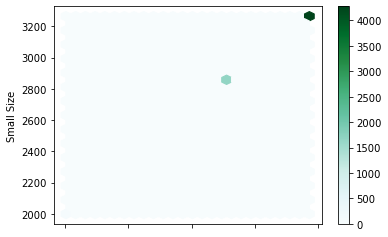

In [21]:
# Stats on image sizes
print(df[["Large Size", "Small Size", "Nb of Pixels"]].agg(
    {
        "Large Size": ["min", "max", "mean", "median"],
        "Small Size": ["min", "max", "mean", "median"],
        "Nb of Pixels": ["min", "max", "mean", "median"]
    }
))

print("\nImage sizes:")
print(df["Image Size"].value_counts())

print("\nNb of pixels:")
print(df["Nb of Pixels"].value_counts())

df.plot.hexbin(x="Large Size", y="Small Size", reduce_C_function=np.max, gridsize=25)

        File Size (Mb)
min           5.020000
max          25.200000
mean         17.238083
median       19.300000


<AxesSubplot:ylabel='Frequency'>

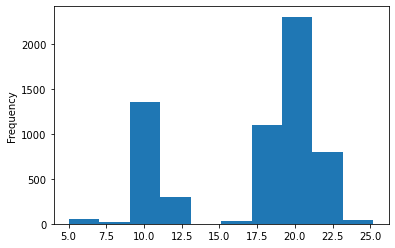

In [22]:
# Stats on file sizes
print(df[["File Size (Mb)"]].agg(
    {
        "File Size (Mb)": ["min", "max", "mean", "median"]
    }
))

df["File Size (Mb)"].plot.hist()

In [23]:
# Stats on image quality
print(df[["Image Quality (bits)"]].agg(
    {
        "Image Quality (bits)": ["min", "max", "mean", "median"]
    }
))

print("\nImage Quality (bits):")
print(df["Image Quality (bits)"].value_counts())

        Image Quality (bits)
min                12.000000
max                14.000000
mean               13.425333
median             14.000000

Image Quality (bits):
14    4276
12    1724
Name: Image Quality (bits), dtype: int64



Images with people:
False    5211
True      789
Name: people, dtype: int64

Percentage of people pictures:  13.15

People compared to other labels:
        outdoor  indoor  landscape  nature  people  objects  buildings
people                                                                
False      4417       0       1813     850       0      594       1446
True        714       0         54       8     789       31        361


<AxesSubplot:ylabel='people'>

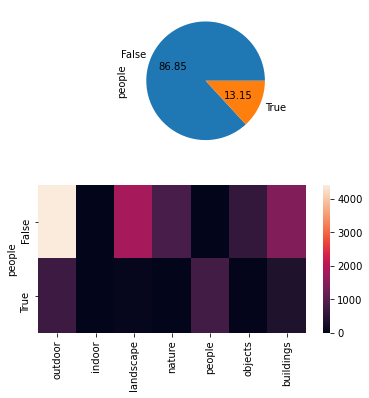

In [24]:
# Stats on labels
print("\nImages with people:")
people_stats = df["people"].value_counts()
print(people_stats)

print("\nPercentage of people pictures: ", people_stats[True]/people_stats.sum()*100)

print("\nPeople compared to other labels:")
label_comparison = df.groupby("people")[KEYWORDS].sum()
print(label_comparison)

fig, axes = plt.subplots(nrows=2, ncols=1)
people_stats.plot.pie(autopct="%.2f", figsize=(6, 6), ax=axes[0])
sn.heatmap(label_comparison, ax=axes[1])

We see here that 
- We only have 3 different image shapes.
- Only 13% of the pictures have people on them.

### Then on images
(less data)

In [25]:
df_images = df.dropna(subset=["Width"])

# Number of images
print("Number of images: ", df_images.shape[0], "\n")

Number of images:  50 



         Height    Width     Ratio
min     2848.00  2848.00  0.662338
max     4928.00  4928.00  1.509804
mean    3557.12  4275.84  1.271934
median  3264.00  4928.00  1.509804

Image sizes:
L (4928 x 3264)    4276
L (4288 x 2848)    1673
L (3008 x 2000)      51
Name: Image Size, dtype: int64

Ratios:
1.509804    26
1.505618    10
0.664179     7
0.662338     7
Name: Ratio, dtype: int64


<AxesSubplot:ylabel='Frequency'>

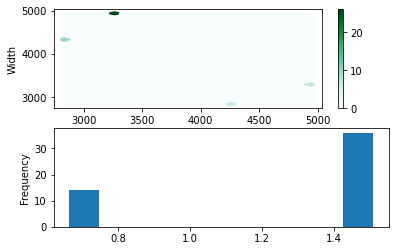

In [26]:
# Stats on size
print(df[["Height", "Width", "Ratio"]].agg(
    {
        "Height": ["min", "max", "mean", "median"],
        "Width": ["min", "max", "mean", "median"],
        "Ratio": ["min", "max", "mean", "median"]
    }
))

print("\nImage sizes:")
print(df["Image Size"].value_counts())

print("\nRatios:")
print(df["Ratio"].value_counts())

fig, axes = plt.subplots(nrows=2, ncols=1)
df.plot.hexbin(x="Height", y="Width", reduce_C_function=np.max, gridsize=25, ax=axes[0])
df["Ratio"].plot.hist(ax=axes[1])

We see here that sometimes pictures are on portrait mode, and sometimes they are on landscape mode.